# end2end model: EANN/DANN

In [1]:
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

train_we = np.load('../Semantics/data/train_we_(32193, 120).npy')
test_we = np.load('../Semantics/data/test_we_(1613, 120).npy')
we_emb_matrix = np.load(
    '../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_fake_train = np.load('../dataset/data/train_label_(32193, 2).npy')
y_fake_test = np.load('../dataset/data/test_label_(1613, 2).npy')

y_category_train = np.load(
    '../dataset/data/train_category_label_(32193, 8).npy')
y_category_test = np.load('../dataset/data/test_category_label_(1613, 8).npy')

train_we.shape, test_we.shape, y_fake_train.shape, y_fake_test.shape, y_category_train.shape, y_category_test.shape

((32193, 120), (1613, 120), (32193, 2), (1613, 2), (32193, 8), (1613, 8))

## BiGRU

In [2]:
from TextTransferModels import End2endBiGRU
from train import train

model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py




Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 120, 64)      63936       embedding_1[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_1 (Glo (None, 64)           0  

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 120, 64)      63936       embedding_3[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 64)           0           bidirectional_3[0][0]            
__________________________________________________________________________________________________
global_max

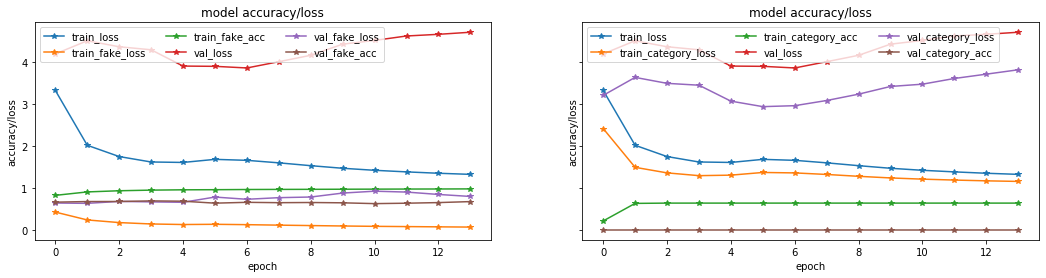


TEST_sz: 1613

Accuracy: 0.6931184128952262

              precision    recall  f1-score   support

       truth      0.651     0.958     0.775       891
       rumor      0.877     0.366     0.516       722

   micro avg      0.693     0.693     0.693      1613
   macro avg      0.764     0.662     0.646      1613
weighted avg      0.752     0.693     0.659      1613
 samples avg      0.693     0.693     0.693      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='End2endBiGRU', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 120, 64)      63936       embedding_2[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 64)           0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
global_max

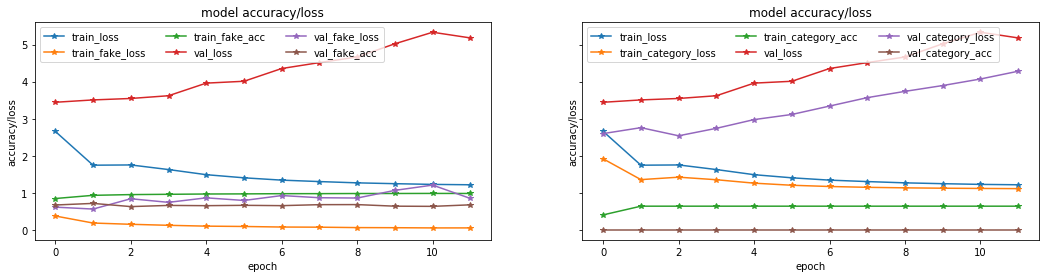


TEST_sz: 1613

Accuracy: 0.7154370737755734

              precision    recall  f1-score   support

       truth      0.674     0.941     0.785       891
       rumor      0.856     0.438     0.579       722

   micro avg      0.715     0.715     0.715      1613
   macro avg      0.765     0.689     0.682      1613
weighted avg      0.755     0.715     0.693      1613
 samples avg      0.715     0.715     0.715      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [3]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='End2endBiGRU2', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128, multi_output=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 120, 64)      63936       embedding_3[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 64)           0           bidirectional_3[0][0]            
__________________________________________________________________________________________________
global_max

Epoch 20/100
32193/32193 [==============================] - 51s 2ms/step - loss: 1.1626 - fake_loss: 0.0322 - category_loss: 1.0970 - fake_acc: 0.9915 - category_acc: 0.6404 - val_loss: 6.4137 - val_fake_loss: 0.9205 - val_category_loss: 5.4604 - val_fake_acc: 0.7266 - val_category_acc: 0.0000e+00
Epoch 21/100
32193/32193 [==============================] - 50s 2ms/step - loss: 1.1583 - fake_loss: 0.0308 - category_loss: 1.0957 - fake_acc: 0.9917 - category_acc: 0.6404 - val_loss: 6.6337 - val_fake_loss: 0.9954 - val_category_loss: 5.6079 - val_fake_acc: 0.7192 - val_category_acc: 0.0000e+00
Epoch 00021: early stopping


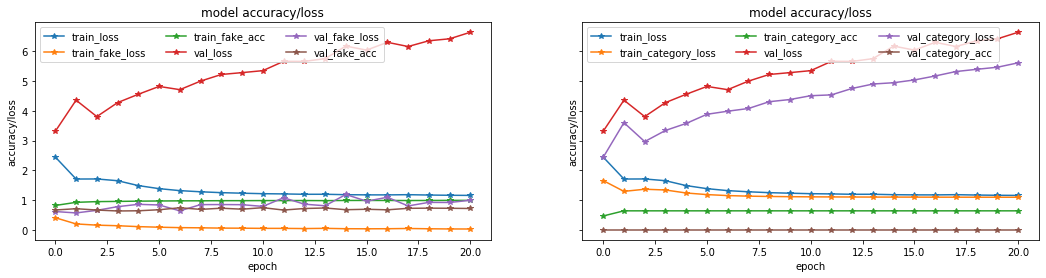


TEST_sz: 1613

Accuracy: 0.7464352138871667

              precision    recall  f1-score   support

       truth      0.719     0.889     0.795       891
       rumor      0.806     0.571     0.668       722

   micro avg      0.746     0.746     0.746      1613
   macro avg      0.762     0.730     0.732      1613
weighted avg      0.758     0.746     0.738      1613
 samples avg      0.746     0.746     0.746      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='End2endBiGRU3', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128, multi_output=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 120, 64)      63936       embedding_4[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_4 (Glo (None, 64)           0           bidirectional_4[0][0]            
__________________________________________________________________________________________________
global_max

Epoch 20/100
32193/32193 [==============================] - 51s 2ms/step - loss: 1.1810 - fake_loss: 0.0383 - category_loss: 1.0980 - fake_acc: 0.9890 - category_acc: 0.6404 - val_loss: 6.6113 - val_fake_loss: 0.9565 - val_category_loss: 5.6118 - val_fake_acc: 0.7018 - val_category_acc: 0.0000e+00
Epoch 00020: early stopping


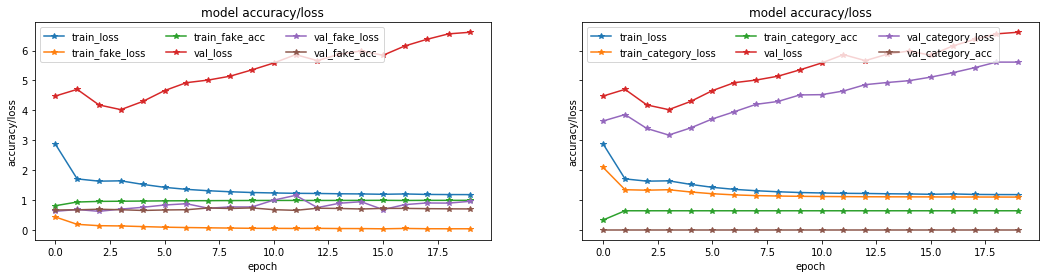


TEST_sz: 1613

Accuracy: 0.735895846249225

              precision    recall  f1-score   support

       truth      0.706     0.893     0.789       891
       rumor      0.805     0.542     0.647       722

   micro avg      0.736     0.736     0.736      1613
   macro avg      0.755     0.717     0.718      1613
weighted avg      0.750     0.736     0.726      1613
 samples avg      0.736     0.736     0.736      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613


In [5]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='End2endBiGRU4', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128, multi_output=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 120, 64)      63936       embedding_5[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_5 (Glo (None, 64)           0           bidirectional_5[0][0]            
__________________________________________________________________________________________________
global_max

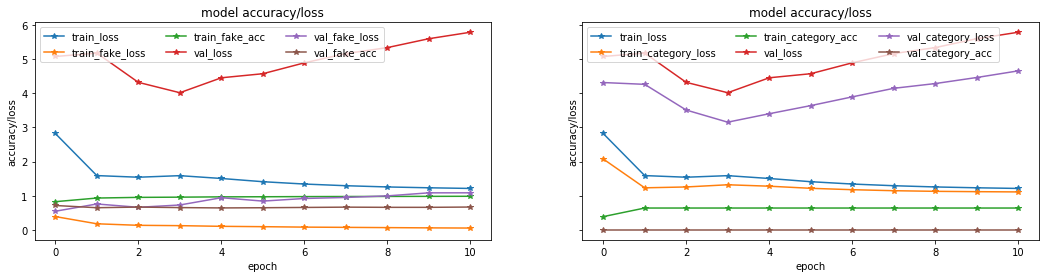


TEST_sz: 1613

Accuracy: 0.7148171109733416

              precision    recall  f1-score   support

       truth      0.680     0.914     0.780       891
       rumor      0.815     0.470     0.596       722

   micro avg      0.715     0.715     0.715      1613
   macro avg      0.747     0.692     0.688      1613
weighted avg      0.740     0.715     0.697      1613
 samples avg      0.715     0.715     0.715      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix).model

# 3.修改model_name、超参数
train(model, model_name='End2endBiGRU5', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=128, multi_output=True)

## TextCNN

In [2]:
from TextTransferModels import End2endTextCNN
from train import train

model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 118, 256)     230656      embedding_1[0][0]                
_______________________________________

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 118, 256)     230656      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 117, 256)     307456      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (

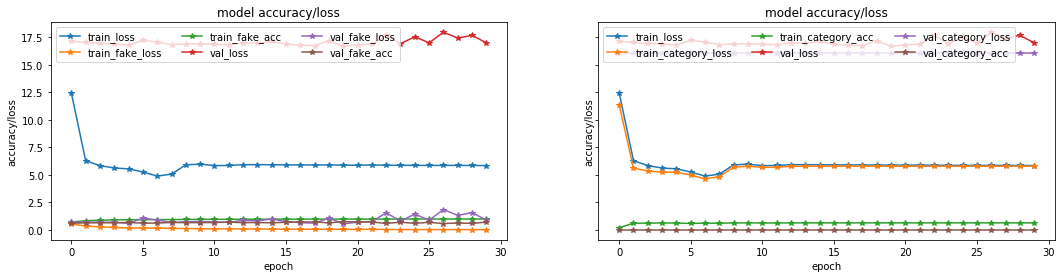


TEST_sz: 1613

Accuracy: 0.755114693118413

              precision    recall  f1-score   support

       truth      0.721     0.907     0.804       891
       rumor      0.832     0.568     0.675       722

   micro avg      0.755     0.755     0.755      1613
   macro avg      0.777     0.737     0.739      1613
weighted avg      0.771     0.755     0.746      1613
 samples avg      0.755     0.755     0.755      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [3]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='End2endTextCNN', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 118, 256)     230656      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 117, 256)     307456      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_9 (

Epoch 15/100
32193/32193 [==============================] - 4s 114us/step - loss: 5.9324 - fake_loss: 0.0754 - category_loss: 5.7927 - fake_acc: 0.9705 - category_acc: 0.6404 - val_loss: 16.6151 - val_fake_loss: 0.4682 - val_category_loss: 16.0831 - val_fake_acc: 0.7812 - val_category_acc: 0.0000e+00
Epoch 16/100
32193/32193 [==============================] - 4s 112us/step - loss: 5.9146 - fake_loss: 0.0610 - category_loss: 5.7917 - fake_acc: 0.9777 - category_acc: 0.6404 - val_loss: 16.9575 - val_fake_loss: 0.8151 - val_category_loss: 16.0828 - val_fake_acc: 0.6689 - val_category_acc: 0.0000e+00
Epoch 17/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.8108 - fake_loss: 0.0582 - category_loss: 5.6940 - fake_acc: 0.9792 - category_acc: 0.6295 - val_loss: 16.9811 - val_fake_loss: 0.8410 - val_category_loss: 16.0828 - val_fake_acc: 0.6689 - val_category_acc: 0.0000e+00
Epoch 18/100
32193/32193 [==============================] - 4s 113us/step - loss: 5.9050 - fak

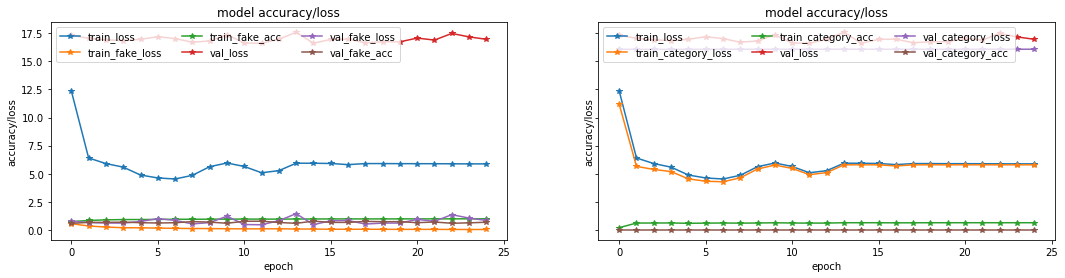


TEST_sz: 1613

Accuracy: 0.7811531308121513

              precision    recall  f1-score   support

       truth      0.773     0.854     0.812       891
       rumor      0.793     0.691     0.739       722

   micro avg      0.781     0.781     0.781      1613
   macro avg      0.783     0.773     0.775      1613
weighted avg      0.782     0.781     0.779      1613
 samples avg      0.781     0.781     0.781      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='End2endTextCNN2', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 118, 256)     230656      embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 117, 256)     307456      embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_12 

Epoch 15/100
32193/32193 [==============================] - 4s 112us/step - loss: 5.5949 - fake_loss: 0.0817 - category_loss: 5.4435 - fake_acc: 0.9684 - category_acc: 0.6221 - val_loss: 17.2480 - val_fake_loss: 1.0953 - val_category_loss: 16.0839 - val_fake_acc: 0.6076 - val_category_acc: 0.0000e+00
Epoch 16/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.9324 - fake_loss: 0.0764 - category_loss: 5.7883 - fake_acc: 0.9705 - category_acc: 0.6364 - val_loss: 17.1970 - val_fake_loss: 1.0469 - val_category_loss: 16.0839 - val_fake_acc: 0.6125 - val_category_acc: 0.0000e+00
Epoch 17/100
32193/32193 [==============================] - 4s 112us/step - loss: 5.9230 - fake_loss: 0.0646 - category_loss: 5.7940 - fake_acc: 0.9762 - category_acc: 0.6404 - val_loss: 17.3170 - val_fake_loss: 1.1699 - val_category_loss: 16.0839 - val_fake_acc: 0.5939 - val_category_acc: 0.0000e+00
Epoch 18/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.9201 - fak

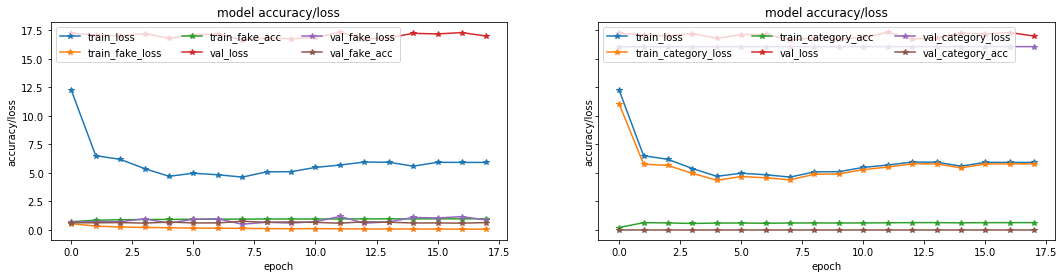


TEST_sz: 1613

Accuracy: 0.7563546187228767

              precision    recall  f1-score   support

       truth      0.728     0.891     0.802       891
       rumor      0.815     0.590     0.684       722

   micro avg      0.756     0.756     0.756      1613
   macro avg      0.771     0.741     0.743      1613
weighted avg      0.767     0.756     0.749      1613
 samples avg      0.756     0.756     0.756      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [5]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='End2endTextCNN3', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 118, 256)     230656      embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 117, 256)     307456      embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_15 

Epoch 15/100
32193/32193 [==============================] - 3s 108us/step - loss: 5.9254 - fake_loss: 0.0749 - category_loss: 5.7887 - fake_acc: 0.9720 - category_acc: 0.6404 - val_loss: 16.8980 - val_fake_loss: 0.7553 - val_category_loss: 16.0829 - val_fake_acc: 0.6603 - val_category_acc: 0.0000e+00
Epoch 16/100
32193/32193 [==============================] - 4s 112us/step - loss: 5.9122 - fake_loss: 0.0684 - category_loss: 5.7859 - fake_acc: 0.9746 - category_acc: 0.6404 - val_loss: 17.4163 - val_fake_loss: 1.2787 - val_category_loss: 16.0818 - val_fake_acc: 0.5921 - val_category_acc: 0.0000e+00
Epoch 17/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.6193 - fake_loss: 0.0769 - category_loss: 5.4866 - fake_acc: 0.9705 - category_acc: 0.6138 - val_loss: 16.8220 - val_fake_loss: 0.6826 - val_category_loss: 16.0833 - val_fake_acc: 0.6863 - val_category_acc: 0.0000e+00
Epoch 00017: early stopping


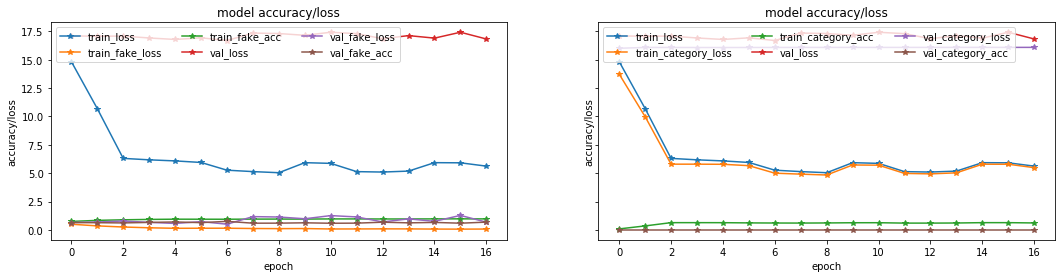


TEST_sz: 1613

Accuracy: 0.7538747675139492

              precision    recall  f1-score   support

       truth      0.725     0.892     0.800       891
       rumor      0.814     0.583     0.680       722

   micro avg      0.754     0.754     0.754      1613
   macro avg      0.770     0.738     0.740      1613
weighted avg      0.765     0.754     0.746      1613
 samples avg      0.754     0.754     0.754      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='End2endTextCNN4', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 118, 256)     230656      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 117, 256)     307456      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_18 

Epoch 15/100
32193/32193 [==============================] - 4s 112us/step - loss: 5.4560 - fake_loss: 0.0736 - category_loss: 5.3136 - fake_acc: 0.9729 - category_acc: 0.6196 - val_loss: 17.0674 - val_fake_loss: 0.9162 - val_category_loss: 16.0840 - val_fake_acc: 0.6435 - val_category_acc: 0.0000e+00
Epoch 16/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.9311 - fake_loss: 0.0722 - category_loss: 5.7929 - fake_acc: 0.9729 - category_acc: 0.6404 - val_loss: 17.1827 - val_fake_loss: 1.0337 - val_category_loss: 16.0840 - val_fake_acc: 0.6311 - val_category_acc: 0.0000e+00
Epoch 17/100
32193/32193 [==============================] - 4s 111us/step - loss: 5.9141 - fake_loss: 0.0579 - category_loss: 5.7925 - fake_acc: 0.9783 - category_acc: 0.6404 - val_loss: 17.0274 - val_fake_loss: 0.8810 - val_category_loss: 16.0840 - val_fake_acc: 0.6615 - val_category_acc: 0.0000e+00
Epoch 18/100
32193/32193 [==============================] - 4s 110us/step - loss: 5.9098 - fak

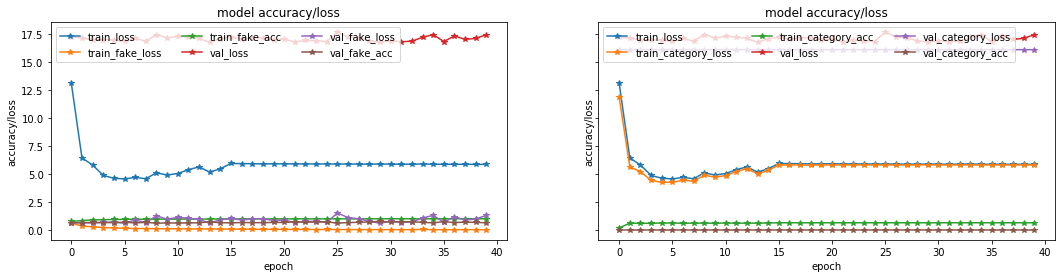


TEST_sz: 1613

Accuracy: 0.7569745815251085

              precision    recall  f1-score   support

       truth      0.723     0.908     0.805       891
       rumor      0.834     0.571     0.678       722

   micro avg      0.757     0.757     0.757      1613
   macro avg      0.778     0.739     0.741      1613
weighted avg      0.773     0.757     0.748      1613
 samples avg      0.757     0.757     0.757      1613



TEST_sz: 1613

Accuracy: 0.0

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000         0
        教育考试      0.000     0.000     0.000         0
        文体娱乐      0.000     0.000     0.000         0
        社会生活      0.000     0.000     0.000         0
          科技      0.000     0.000     0.000         0
        财经商业      0.000     0.000     0.000         0
          军事      0.000     0.000     0.000       372
          政治      0.000     0.000     0.000      1241

   micro avg      0.000     0.000     0.000      1613

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [7]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train, y_category_train]
y_test = [y_fake_test, y_category_test]

# 2.修改model
model = End2endTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, filters_num=256).model

# 3.修改model_name、超参数
train(model, model_name='End2endTextCNN5', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=True)

# Branches - Imbalanced 8 category

In [1]:
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

train_we = np.load('../Semantics/data/train_we_(32193, 120).npy')
test_we = np.load('../Semantics/data/test_we_(1613, 120).npy')
we_emb_matrix = np.load(
    '../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_fake_train = np.load('../dataset/data/train_label_(32193, 2).npy')
y_fake_test = np.load('../dataset/data/test_label_(1613, 2).npy')

train_we.shape, test_we.shape, y_fake_train.shape, y_fake_test.shape

((32193, 120), (1613, 120), (32193, 2), (1613, 2))

## BiGRU

In [2]:
category_train_we = np.load(
    '../dataset/data/category_imbalanced8_X_train_(30424, 120).npy')
cagegory_test_we = np.load(
    '../dataset/data/category_imbalanced8_X_test_(3382, 120).npy')
we_emb_matrix = np.load(
    '../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_category_train = np.load(
    '../dataset/data/category_imbalanced8_y_train_(30424, 8).npy')
y_category_test = np.load(
    '../dataset/data/category_imbalanced8_y_test_(3382, 8).npy')


CATEGORY = ['医药健康', '教育考试', '文体娱乐', '社会生活', '科技', '财经商业', '军事', '政治']

### Related Branch: 0.911 acc

In [4]:
from TextModels import BiGRU
from train import train

model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix, output=8, gradient_reversal=False).model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 120, 64)      63936       embedding_2[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 64)           0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
global_max

#### 不使用class weight

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 120, 64)      63936       embedding_2[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 64)           0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
global_max

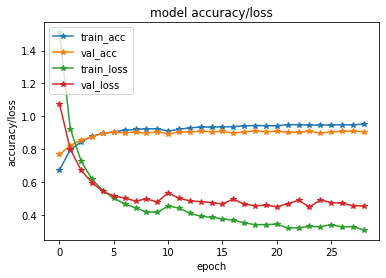

ValueError: Found input variables with inconsistent numbers of samples: [1, 3382]

In [3]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_category_train]
y_test = [y_category_test]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix, output=8, gradient_reversal=False).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_BiGRU_RelatedBranch', 
      train_data=X_train, test_data=X_test,
      train_label=y_train, test_label=y_test, epochs=100, batch_size=256, multi_output=False)

In [5]:
from train import predict, predict_single_output

predict(model, model_file='./model/Branches_Imbalanced8_BiGRU_RelatedBranch.hdf5',
        test_data=[test_we], test_label=[y_category_test], labels_name=CATEGORY)



TEST_sz: 3382

Accuracy: 0.9115907746895329

              precision    recall  f1-score   support

        医药健康      0.939     0.900     0.919       632
        教育考试      0.867     0.800     0.832        90
        文体娱乐      0.853     0.844     0.848       262
        社会生活      0.938     0.968     0.953      2062
          科技      0.000     0.000     0.000        28
        财经商业      0.744     0.836     0.787       146
          军事      0.000     0.000     0.000        37
          政治      0.723     0.816     0.767       125

   micro avg      0.912     0.912     0.912      3382
   macro avg      0.633     0.645     0.638      3382
weighted avg      0.895     0.912     0.903      3382
 samples avg      0.912     0.912     0.912      3382




/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
accuracy_score(y_true=y_category_test, y_pred=y_pred_label)

0.9115907746895329

In [25]:
predict_single_output(y_pred, y_category_test, labels_names=CATEGORY)


TEST_sz: 3382

Accuracy: 0.9115907746895329

              precision    recall  f1-score   support

        医药健康      0.939     0.900     0.919       632
        教育考试      0.867     0.800     0.832        90
        文体娱乐      0.853     0.844     0.848       262
        社会生活      0.938     0.968     0.953      2062
          科技      0.000     0.000     0.000        28
        财经商业      0.744     0.836     0.787       146
          军事      0.000     0.000     0.000        37
          政治      0.723     0.816     0.767       125

   micro avg      0.912     0.912     0.912      3382
   macro avg      0.633     0.645     0.638      3382
weighted avg      0.895     0.912     0.903      3382
 samples avg      0.912     0.912     0.912      3382




/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 使用class weight

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 120, 64)      63936       embedding_3[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 64)           0           bidirectional_3[0][0]            
__________________________________________________________________________________________________
global_max

30424/30424 [==============================] - 24s 782us/step - loss: 0.2452 - acc: 0.9658 - val_loss: 0.4330 - val_acc: 0.9116
Epoch 38/100
30424/30424 [==============================] - 23s 769us/step - loss: 0.2517 - acc: 0.9621 - val_loss: 0.4408 - val_acc: 0.9039
Epoch 39/100
30424/30424 [==============================] - 24s 774us/step - loss: 0.2541 - acc: 0.9635 - val_loss: 0.4645 - val_acc: 0.9033
Epoch 40/100
30424/30424 [==============================] - 24s 777us/step - loss: 0.2698 - acc: 0.9588 - val_loss: 0.4329 - val_acc: 0.9095
Epoch 41/100
30424/30424 [==============================] - 24s 775us/step - loss: 0.2490 - acc: 0.9655 - val_loss: 0.4289 - val_acc: 0.9125
Epoch 42/100
30424/30424 [==============================] - 24s 783us/step - loss: 0.2788 - acc: 0.9559 - val_loss: 0.4253 - val_acc: 0.9148
Epoch 43/100
30424/30424 [==============================] - 24s 779us/step - loss: 0.2436 - acc: 0.9671 - val_loss: 0.4301 - val_acc: 0.9131
Epoch 44/100
30424/30424 [

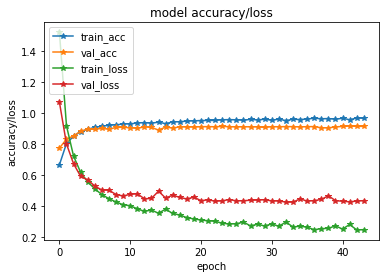


TEST_sz: 3382

Accuracy: 0.9112950916617386

              precision    recall  f1-score   support

        医药健康      0.920     0.910     0.915       632
        教育考试      0.900     0.900     0.900        90
        文体娱乐      0.738     0.882     0.803       262
        社会生活      0.950     0.956     0.953      2062
          科技      0.000     0.000     0.000        28
        财经商业      0.861     0.808     0.834       146
          军事      0.000     0.000     0.000        37
          政治      0.752     0.848     0.797       125

   micro avg      0.911     0.911     0.911      3382
   macro avg      0.640     0.663     0.650      3382
weighted avg      0.897     0.911     0.904      3382
 samples avg      0.911     0.911     0.911      3382




/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_category_train]
y_test = [y_category_test]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=8, gradient_reversal=False).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_BiGRU_RelatedBranch_useClassWeight',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=256, multi_output=False, monitor='val_loss', labels_name=CATEGORY, use_class_weights=True)

### Unrelated Branch: 0.180 acc

In [3]:
from TextModels import BiGRU
from train import train

model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix, output=8, gradient_reversal=True).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py




Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 120, 64)      63936       embedding_1[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_1 (Glo (None, 64)           0  

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 120, 64)      63936       embedding_2[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 64)           0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
global_max

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 30424 samples, validate on 3382 samples
Epoch 1/100
30424/30424 [==============================] - 28s 908us/step - loss: 8.5803 - acc: 0.0730 - val_loss: 8.2021 - val_acc: 0.1869
Epoch 2/100
30424/30424 [==============================] - 27s 890us/step - loss: 2.9733 - acc: 0.4004 - val_loss: 1.6862 - val_acc: 0.6097
Epoch 3/100
30424/30424 [==============================] - 27s 877us/step - loss: 1.6565 - acc: 0.6098 - val_loss: 1.6397 - val_acc: 0.6097
Epoch 4/100
30424/30424 [==============================] - 27s 873us/step - loss: 1.6281 - acc: 0.6098 - val_loss: 1.6176 - val_acc: 0.6097
Epoch 5/100
30424/30424 [==============================] - 26s 868us/step - loss: 1.6262 - acc: 0.6098 - val_loss: 1.6573 - val_acc: 0.6097
Epoch 6/100
30424/30424 [==============================] - 26s 867us/step - loss: 1.7954 - acc: 0.5500 - val_loss: 1.9189 - val_acc: 

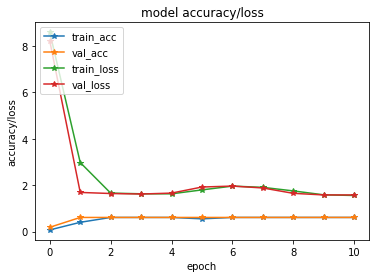


TEST_sz: 3382

Accuracy: 0.1868716735659373

              precision    recall  f1-score   support

        医药健康      0.187     1.000     0.315       632
        教育考试      0.000     0.000     0.000        90
        文体娱乐      0.000     0.000     0.000       262
        社会生活      0.000     0.000     0.000      2062
          科技      0.000     0.000     0.000        28
        财经商业      0.000     0.000     0.000       146
          军事      0.000     0.000     0.000        37
          政治      0.000     0.000     0.000       125

   micro avg      0.187     0.187     0.187      3382
   macro avg      0.023     0.125     0.039      3382
weighted avg      0.035     0.187     0.059      3382
 samples avg      0.187     0.187     0.187      3382




/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_category_train]
y_test = [y_category_test]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=8, gradient_reversal=True).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_BiGRU_UnrelatedBranch_useClassWeight',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=256, multi_output=False, monitor='val_loss', monitor_mode='max',
      labels_name=CATEGORY, use_class_weights=True)

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 120, 64)      63936       embedding_4[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_4 (Glo (None, 64)           0           bidirectional_4[0][0]            
__________________________________________________________________________________________________
global_max

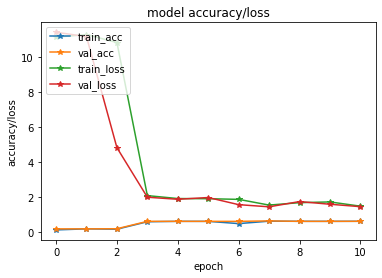


TEST_sz: 3382

Accuracy: 0.1797752808988764

              precision    recall  f1-score   support

        医药健康      0.193     0.946     0.320       632
        教育考试      0.000     0.000     0.000        90
        文体娱乐      0.035     0.038     0.037       262
        社会生活      0.000     0.000     0.000      2062
          科技      0.000     0.000     0.000        28
        财经商业      0.000     0.000     0.000       146
          军事      0.000     0.000     0.000        37
          政治      0.000     0.000     0.000       125

   micro avg      0.180     0.180     0.180      3382
   macro avg      0.029     0.123     0.045      3382
weighted avg      0.039     0.180     0.063      3382
 samples avg      0.180     0.180     0.180      3382




/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_category_train]
y_test = [y_category_test]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=8, gradient_reversal=True).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_BiGRU_UnrelatedBranch_useClassWeight2',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=128, multi_output=False, monitor='val_loss', monitor_mode='max',
      labels_name=CATEGORY, use_class_weights=True)

### Two Branches Merge

In [2]:
from TextModels import BiGRU
from TextTransferModels import TwoBranchesBiGRU
from train import train

related_model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                      output=8, gradient_reversal=False).model
unrelated_model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                        output=8, gradient_reversal=True).model

related_model.load_weights('./model/Branches_Imbalanced8_BiGRU_RelatedBranch_useClassWeight.hdf5')
unrelated_model.load_weights('./model/Branches_Imbalanced8_BiGRU_UnrelatedBranch_useClassWeight2.hdf5')

model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer('category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py




Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead





/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 120, 64)      63936       embedding_3[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 64)           0           bidirectional_3[0][0]            
__________________________________________________________________________________________________
global_max

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 120, 64)      63936       embedding_4[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_4 (Glo (None, 64)           0           bidirectional_4[0][0]            
__________________________________________________________________________________________________
global_max

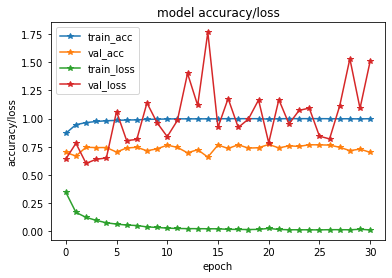


TEST_sz: 1613

Accuracy: 0.7699938003719777

              precision    recall  f1-score   support

       truth      0.735     0.914     0.814       891
       rumor      0.848     0.593     0.698       722

   micro avg      0.770     0.770     0.770      1613
   macro avg      0.791     0.753     0.756      1613
weighted avg      0.785     0.770     0.762      1613
 samples avg      0.770     0.770     0.770      1613




In [3]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_BiGRU_TwoBranches', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

## TextCNN

In [2]:
category_train_we = np.load(
    '../dataset/data/category_imbalanced8_X_train_(30424, 120).npy')
category_test_we = np.load(
    '../dataset/data/category_imbalanced8_X_test_(3382, 120).npy')
we_emb_matrix = np.load(
    '../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_category_train = np.load(
    '../dataset/data/category_imbalanced8_y_train_(30424, 8).npy')
y_category_test = np.load(
    '../dataset/data/category_imbalanced8_y_test_(3382, 8).npy')


CATEGORY = ['医药健康', '教育考试', '文体娱乐', '社会生活', '科技', '财经商业', '军事', '政治']

### Related Branch: 0.946 acc

In [3]:
from TextModels import TextCNN
from train import train

model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, output=8, gradient_reversal=False).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 118, 256)     230656      embedding_1[0][0]                
________________________________________

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 118, 256)     230656      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 117, 256)     307456      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (

Epoch 27/100
30424/30424 [==============================] - 3s 106us/step - loss: 0.1113 - acc: 0.9954 - val_loss: 0.2784 - val_acc: 0.9418
Epoch 28/100
30424/30424 [==============================] - 3s 106us/step - loss: 0.1079 - acc: 0.9957 - val_loss: 0.2798 - val_acc: 0.9429
Epoch 29/100
30424/30424 [==============================] - 3s 108us/step - loss: 0.1062 - acc: 0.9959 - val_loss: 0.2715 - val_acc: 0.9444
Epoch 30/100
30424/30424 [==============================] - 3s 106us/step - loss: 0.1051 - acc: 0.9960 - val_loss: 0.2868 - val_acc: 0.9409
Epoch 31/100
30424/30424 [==============================] - 3s 106us/step - loss: 0.1039 - acc: 0.9960 - val_loss: 0.2800 - val_acc: 0.9426
Epoch 32/100
30424/30424 [==============================] - 3s 106us/step - loss: 0.1011 - acc: 0.9963 - val_loss: 0.2825 - val_acc: 0.9406
Epoch 33/100
30424/30424 [==============================] - 3s 105us/step - loss: 0.0990 - acc: 0.9961 - val_loss: 0.3017 - val_acc: 0.9385
Epoch 34/100
30424/3

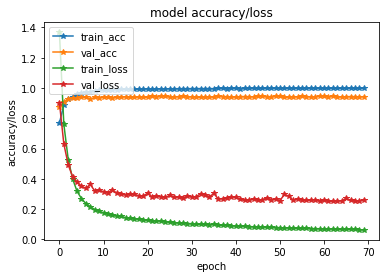


TEST_sz: 3382

Accuracy: 0.946481371969249

              precision    recall  f1-score   support

        医药健康      0.965     0.926     0.945       632
        教育考试      0.940     0.878     0.908        90
        文体娱乐      0.903     0.893     0.898       262
        社会生活      0.957     0.980     0.968      2062
          科技      0.842     0.571     0.681        28
        财经商业      0.876     0.870     0.873       146
          军事      0.805     0.892     0.846        37
          政治      0.907     0.856     0.881       125

   micro avg      0.946     0.946     0.946      3382
   macro avg      0.900     0.858     0.875      3382
weighted avg      0.946     0.946     0.946      3382
 samples avg      0.946     0.946     0.946      3382




In [6]:
# 1.修改输入数据
X_train = [category_train_we]
X_test = [category_test_we]

y_train = [y_category_train]
y_test = [y_category_test]

# 2.修改model
model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                output=8, gradient_reversal=False).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_TextCNN_RelatedBranch_useClassWeight',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=256, multi_output=False, monitor='val_loss', labels_name=CATEGORY, use_class_weights=True)

### Unelated Branch:  0.027 acc

In [3]:
from TextModels import TextCNN
from train import train

model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, output=8, gradient_reversal=True).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 118, 256)     230656      embedding_1[0][0]                
_______________________________________

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 118, 256)     230656      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 117, 256)     307456      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 30424 samples, validate on 3382 samples
Epoch 1/100
30424/30424 [==============================] - 6s 191us/step - loss: 16.0578 - acc: 0.0274 - val_loss: 16.1680 - val_acc: 0.0266
Epoch 2/100
30424/30424 [==============================] - 3s 109us/step - loss: 16.0624 - acc: 0.0267 - val_loss: 15.9824 - val_acc: 0.0266
Epoch 3/100
30424/30424 [==============================] - 3s 108us/step - loss: 15.9187 - acc: 0.0267 - val_loss: 15.8750 - val_acc: 0.0266
Epoch 4/100
30424/30424 [==============================] - 3s 108us/step - loss: 15.8350 - acc: 0.0267 - val_loss: 15.8110 - val_acc: 0.0266
Epoch 5/100
30424/30424 [==============================] - 3s 107us/step - loss: 15.7844 - acc: 0.0267 - val_loss: 15.7714 - val_acc: 0.0266
Epoch 6/100
30424/30424 [==============================] - 3s 107us/step - loss: 15.7527 - acc: 0.0267 - val_loss: 15.7480 - val

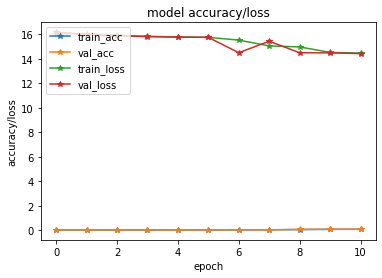


TEST_sz: 3382

Accuracy: 0.026611472501478415

              precision    recall  f1-score   support

        医药健康      0.000     0.000     0.000       632
        教育考试      0.027     1.000     0.052        90
        文体娱乐      0.000     0.000     0.000       262
        社会生活      0.000     0.000     0.000      2062
          科技      0.000     0.000     0.000        28
        财经商业      0.000     0.000     0.000       146
          军事      0.000     0.000     0.000        37
          政治      0.000     0.000     0.000       125

   micro avg      0.027     0.027     0.027      3382
   macro avg      0.003     0.125     0.006      3382
weighted avg      0.001     0.027     0.001      3382
 samples avg      0.027     0.027     0.027      3382




/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [4]:
# 1.修改输入数据
X_train = [category_train_we]
X_test = [category_test_we]

y_train = [y_category_train]
y_test = [y_category_test]

# 2.修改model
model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                output=8, gradient_reversal=True).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_TextCNN_UnrelatedBranch_useClassWeight',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=256, monitor='val_loss', monitor_mode='max', labels_name=CATEGORY, use_class_weights=True)

### Two Branches Merge

In [4]:
from TextModels import TextCNN
from TextTransferModels import TwoBranchesTextCNN
from train import train

related_model = TextCNN(max_sequence_length=120,
                        embedding_matrix=we_emb_matrix, output=8, gradient_reversal=False).model
unrelated_model = TextCNN(max_sequence_length=120,
                          embedding_matrix=we_emb_matrix, output=8, gradient_reversal=True).model

related_model.load_weights(
    './model/Branches_Imbalanced8_TextCNN_RelatedBranch_useClassWeight.hdf5')
unrelated_model.load_weights(
    './model/Branches_Imbalanced8_TextCNN_UnrelatedBranch_useClassWeight.hdf5')

model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 118, 256)     230656      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 117, 256)     307456      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_18 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 118, 256)     230656      embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 117, 256)     307456      embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_21 

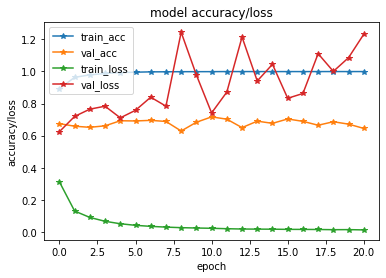


TEST_sz: 1613

Accuracy: 0.7166769993800371

              precision    recall  f1-score   support

       truth      0.676     0.936     0.785       891
       rumor      0.850     0.446     0.585       722

   micro avg      0.717     0.717     0.717      1613
   macro avg      0.763     0.691     0.685      1613
weighted avg      0.754     0.717     0.695      1613
 samples avg      0.717     0.717     0.717      1613




In [11]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_TextCNN_TwoBranches', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 118, 256)     230656      embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, 117, 256)     307456      embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_24 

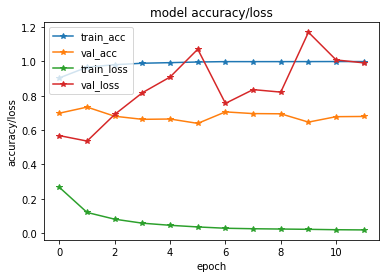


TEST_sz: 1613

Accuracy: 0.7334159950402975

              precision    recall  f1-score   support

       truth      0.706     0.888     0.786       891
       rumor      0.797     0.543     0.646       722

   micro avg      0.733     0.733     0.733      1613
   macro avg      0.751     0.715     0.716      1613
weighted avg      0.746     0.733     0.723      1613
 samples avg      0.733     0.733     0.733      1613




In [12]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_TextCNN_TwoBranches2', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 118, 256)     230656      embedding_9[0][0]                
__________________________________________________________________________________________________
conv1d_26 (Conv1D)              (None, 117, 256)     307456      embedding_9[0][0]                
__________________________________________________________________________________________________
conv1d_27 

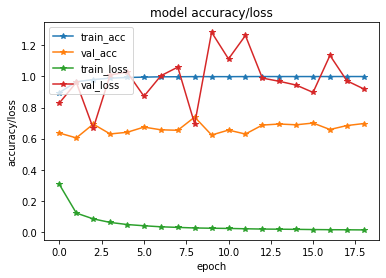


TEST_sz: 1613

Accuracy: 0.7383756974581525

              precision    recall  f1-score   support

       truth      0.694     0.943     0.799       891
       rumor      0.873     0.486     0.625       722

   micro avg      0.738     0.738     0.738      1613
   macro avg      0.783     0.714     0.712      1613
weighted avg      0.774     0.738     0.721      1613
 samples avg      0.738     0.738     0.738      1613




In [13]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_TextCNN_TwoBranches3', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_28 (Conv1D)              (None, 118, 256)     230656      embedding_10[0][0]               
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 117, 256)     307456      embedding_10[0][0]               
__________________________________________________________________________________________________
conv1d_30 

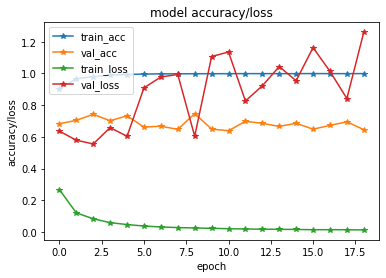


TEST_sz: 1613

Accuracy: 0.7464352138871667

              precision    recall  f1-score   support

       truth      0.716     0.897     0.796       891
       rumor      0.815     0.561     0.664       722

   micro avg      0.746     0.746     0.746      1613
   macro avg      0.765     0.729     0.730      1613
weighted avg      0.760     0.746     0.737      1613
 samples avg      0.746     0.746     0.746      1613




In [14]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_TextCNN_TwoBranches4', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_31 (Conv1D)              (None, 118, 256)     230656      embedding_11[0][0]               
__________________________________________________________________________________________________
conv1d_32 (Conv1D)              (None, 117, 256)     307456      embedding_11[0][0]               
__________________________________________________________________________________________________
conv1d_33 

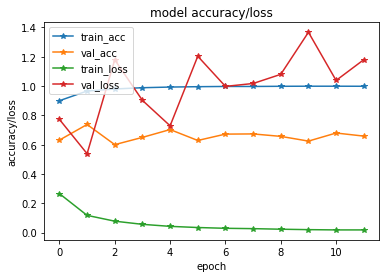


TEST_sz: 1613

Accuracy: 0.7377557346559206

              precision    recall  f1-score   support

       truth      0.698     0.925     0.796       891
       rumor      0.845     0.507     0.634       722

   micro avg      0.738     0.738     0.738      1613
   macro avg      0.772     0.716     0.715      1613
weighted avg      0.764     0.738     0.723      1613
 samples avg      0.738     0.738     0.738      1613




In [15]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Imbalanced8_TextCNN_TwoBranches5', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

# Branches - Balanced 3 category

In [1]:
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

train_we = np.load('../Semantics/data/train_we_(32193, 120).npy')
test_we = np.load('../Semantics/data/test_we_(1613, 120).npy')
we_emb_matrix = np.load(
    '../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_fake_train = np.load('../dataset/data/train_label_(32193, 2).npy')
y_fake_test = np.load('../dataset/data/test_label_(1613, 2).npy')

train_we.shape, test_we.shape, y_fake_train.shape, y_fake_test.shape

((32193, 120), (1613, 120), (32193, 2), (1613, 2))

## BiGRU

In [2]:
category_train_we = np.load(
    '../dataset/data/category_balanced3_X_train_(1054, 120).npy')
category_test_we = np.load(
    '../dataset/data/category_balanced3_X_test_(118, 120).npy')
we_emb_matrix = np.load(
    '../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_category_train = np.load(
    '../dataset/data/category_balanced3_y_train_(1054, 3).npy')
y_category_test = np.load(
    '../dataset/data/category_balanced3_y_test_(118, 3).npy')


CATEGORY = ['军事', '政治', '其他']

### Related Branch:  0.932 acc

In [4]:
from TextModels import BiGRU
from train import train

model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=3, gradient_reversal=False).model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 120, 64)      63936       embedding_2[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 64)           0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
global_max

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 120, 64)      63936       embedding_4[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_4 (Glo (None, 64)           0           bidirectional_4[0][0]            
__________________________________________________________________________________________________
global_max

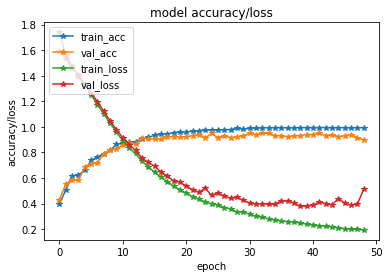


TEST_sz: 118

Accuracy: 0.9322033898305084

              precision    recall  f1-score   support

          军事      0.925     0.974     0.949        38
          政治      0.972     0.875     0.921        40
          其他      0.905     0.950     0.927        40

   micro avg      0.932     0.932     0.932       118
   macro avg      0.934     0.933     0.932       118
weighted avg      0.934     0.932     0.932       118
 samples avg      0.932     0.932     0.932       118




In [6]:
# 1.修改输入数据
X_train = [category_train_we]
X_test = [category_test_we]

y_train = [y_category_train]
y_test = [y_category_test]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=3, gradient_reversal=False).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_RelatedBranch_useClassWeight',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=256, multi_output=False, monitor='val_loss', labels_name=CATEGORY, use_class_weights=True)

### Unrelated Branch:  0.339 acc

In [7]:
from TextModels import BiGRU
from train import train

model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=3, gradient_reversal=True).model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 120, 64)      63936       embedding_5[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_5 (Glo (None, 64)           0           bidirectional_5[0][0]            
__________________________________________________________________________________________________
global_max

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 120, 64)      63936       embedding_7[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_7 (Glo (None, 64)           0           bidirectional_7[0][0]            
__________________________________________________________________________________________________
global_max

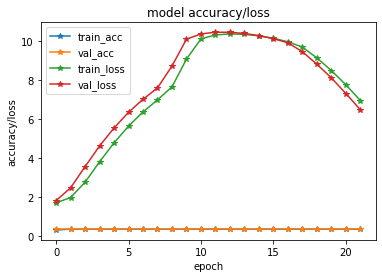


TEST_sz: 118

Accuracy: 0.3389830508474576

              precision    recall  f1-score   support

          军事      0.000     0.000     0.000        38
          政治      0.000     0.000     0.000        40
          其他      0.339     1.000     0.506        40

   micro avg      0.339     0.339     0.339       118
   macro avg      0.113     0.333     0.169       118
weighted avg      0.115     0.339     0.172       118
 samples avg      0.339     0.339     0.339       118




/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
# 1.修改输入数据
X_train = [category_train_we]
X_test = [category_test_we]

y_train = [y_category_train]
y_test = [y_category_test]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=3, gradient_reversal=True).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_UnrelatedBranch_useClassWeight',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=256, multi_output=False, monitor='val_loss', monitor_mode='max', labels_name=CATEGORY, use_class_weights=True)

### Two Branches Merge

In [3]:
from TextModels import BiGRU
from TextTransferModels import TwoBranchesBiGRU
from train import train

related_model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                      output=3, gradient_reversal=False).model
unrelated_model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                        output=3, gradient_reversal=True).model

related_model.load_weights('./model/Branches_Balanced3_BiGRU_RelatedBranch_useClassWeight.hdf5')
unrelated_model.load_weights('./model/Branches_Balanced3_BiGRU_UnrelatedBranch_useClassWeight.hdf5')

model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer('category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py




Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead





/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 120, 64)      63936       embedding_3[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 64)           0           bidirectional_3[0][0]            
__________________________________________________________________________________________________
global_max

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 120, 64)      63936       embedding_4[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_4 (Glo (None, 64)           0           bidirectional_4[0][0]            
__________________________________________________________________________________________________
global_max

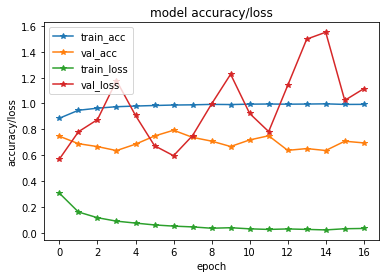


TEST_sz: 1613

Accuracy: 0.7929324240545568

              precision    recall  f1-score   support

       truth      0.830     0.787     0.808       891
       rumor      0.753     0.801     0.776       722

   micro avg      0.793     0.793     0.793      1613
   macro avg      0.791     0.794     0.792      1613
weighted avg      0.795     0.793     0.793      1613
 samples avg      0.793     0.793     0.793      1613




In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 120, 64)      63936       embedding_7[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_7 (Glo (None, 64)           0           bidirectional_7[0][0]            
__________________________________________________________________________________________________
global_max

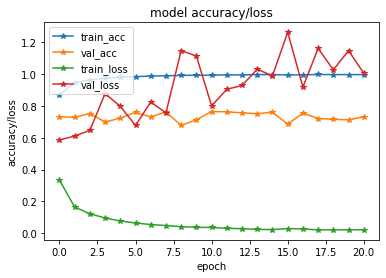


TEST_sz: 1613

Accuracy: 0.7650340979541228

              precision    recall  f1-score   support

       truth      0.731     0.909     0.810       891
       rumor      0.840     0.587     0.691       722

   micro avg      0.765     0.765     0.765      1613
   macro avg      0.785     0.748     0.751      1613
weighted avg      0.780     0.765     0.757      1613
 samples avg      0.765     0.765     0.765      1613




In [7]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches2', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_8 (Bidirectional) (None, 120, 64)      63936       embedding_8[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_8 (Glo (None, 64)           0           bidirectional_8[0][0]            
__________________________________________________________________________________________________
global_max

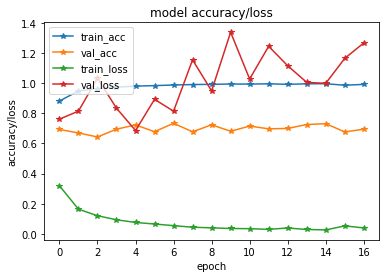


TEST_sz: 1613

Accuracy: 0.7334159950402975

              precision    recall  f1-score   support

       truth      0.693     0.929     0.794       891
       rumor      0.849     0.492     0.623       722

   micro avg      0.733     0.733     0.733      1613
   macro avg      0.771     0.710     0.708      1613
weighted avg      0.763     0.733     0.717      1613
 samples avg      0.733     0.733     0.733      1613




In [8]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_TwoBranches3', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

## TextCNN

In [2]:
category_train_we = np.load(
    '../dataset/data/category_balanced3_X_train_(1054, 120).npy')
category_test_we = np.load(
    '../dataset/data/category_balanced3_X_test_(118, 120).npy')
we_emb_matrix = np.load(
    '../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_category_train = np.load(
    '../dataset/data/category_balanced3_y_train_(1054, 3).npy')
y_category_test = np.load(
    '../dataset/data/category_balanced3_y_test_(118, 3).npy')


CATEGORY = ['军事', '政治', '其他']

### Related Branch: 0.941 acc

In [3]:
from TextModels import TextCNN
from train import train

model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, output=3, gradient_reversal=False).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 118, 256)     230656      embedding_1[0][0]                
________________________________________

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 118, 256)     230656      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 117, 256)     307456      embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (

1054/1054 [==============================] - 0s 120us/step - loss: 0.1502 - acc: 1.0000 - val_loss: 0.2789 - val_acc: 0.9407
Epoch 87/100
1054/1054 [==============================] - 0s 145us/step - loss: 0.1473 - acc: 1.0000 - val_loss: 0.2747 - val_acc: 0.9407
Epoch 88/100
1054/1054 [==============================] - 0s 118us/step - loss: 0.1449 - acc: 1.0000 - val_loss: 0.2824 - val_acc: 0.9407
Epoch 89/100
1054/1054 [==============================] - 0s 148us/step - loss: 0.1427 - acc: 1.0000 - val_loss: 0.2697 - val_acc: 0.9407
Epoch 90/100
1054/1054 [==============================] - 0s 120us/step - loss: 0.1409 - acc: 1.0000 - val_loss: 0.2729 - val_acc: 0.9407
Epoch 91/100
1054/1054 [==============================] - 0s 149us/step - loss: 0.1383 - acc: 1.0000 - val_loss: 0.2670 - val_acc: 0.9407
Epoch 92/100
1054/1054 [==============================] - 0s 151us/step - loss: 0.1364 - acc: 1.0000 - val_loss: 0.2617 - val_acc: 0.9407
Epoch 93/100
1054/1054 [=======================

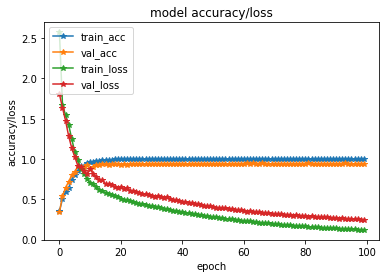


TEST_sz: 118

Accuracy: 0.940677966101695

              precision    recall  f1-score   support

          军事      1.000     0.947     0.973        38
          政治      0.947     0.900     0.923        40
          其他      0.886     0.975     0.929        40

   micro avg      0.941     0.941     0.941       118
   macro avg      0.945     0.941     0.942       118
weighted avg      0.944     0.941     0.941       118
 samples avg      0.941     0.941     0.941       118




In [4]:
# 1.修改输入数据
X_train = [category_train_we]
X_test = [category_test_we]

y_train = [y_category_train]
y_test = [y_category_test]

# 2.修改model
model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                output=3, gradient_reversal=False).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_TextCNN_RelatedBranch_useClassWeight',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=256, multi_output=False, monitor='val_loss', labels_name=CATEGORY, use_class_weights=True)

### Unelated Branch:  0.322 acc

In [5]:
from TextModels import TextCNN
from train import train

model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix, output=3, gradient_reversal=True).model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 118, 256)     230656      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 117, 256)     307456      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_9 (

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 118, 256)     230656      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 117, 256)     307456      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_18 

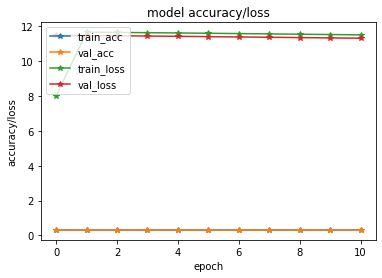


TEST_sz: 118

Accuracy: 0.3220338983050847

              precision    recall  f1-score   support

          军事      0.322     1.000     0.487        38
          政治      0.000     0.000     0.000        40
          其他      0.000     0.000     0.000        40

   micro avg      0.322     0.322     0.322       118
   macro avg      0.107     0.333     0.162       118
weighted avg      0.104     0.322     0.157       118
 samples avg      0.322     0.322     0.322       118




/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
# 1.修改输入数据
X_train = [category_train_we]
X_test = [category_test_we]

y_train = [y_category_train]
y_test = [y_category_test]

# 2.修改model
model = TextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                output=3, gradient_reversal=True).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_TextCNN_UnrelatedBranch_useClassWeight',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=256, monitor='val_loss', monitor_mode='max', labels_name=CATEGORY, use_class_weights=True)

### Two Branches Merge

In [3]:
from TextModels import TextCNN
from TextTransferModels import TwoBranchesTextCNN
from train import train

related_model = TextCNN(max_sequence_length=120,
                        embedding_matrix=we_emb_matrix, output=3, gradient_reversal=False).model
unrelated_model = TextCNN(max_sequence_length=120,
                          embedding_matrix=we_emb_matrix, output=3, gradient_reversal=True).model

related_model.load_weights(
    './model/Branches_Balanced3_TextCNN_RelatedBranch_useClassWeight.hdf5')
unrelated_model.load_weights(
    './model/Branches_Balanced3_TextCNN_UnrelatedBranch_useClassWeight.hdf5')

model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead





/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 118, 256)     230656      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 117, 256)     307456      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_9 (

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 118, 256)     230656      embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 117, 256)     307456      embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_12 

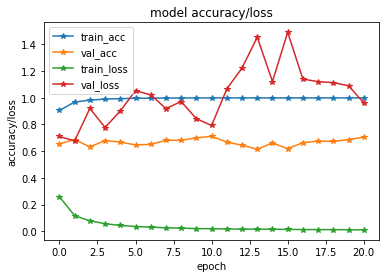


TEST_sz: 1613

Accuracy: 0.7117172969621822

              precision    recall  f1-score   support

       truth      0.669     0.947     0.784       891
       rumor      0.866     0.421     0.567       722

   micro avg      0.712     0.712     0.712      1613
   macro avg      0.767     0.684     0.675      1613
weighted avg      0.757     0.712     0.687      1613
 samples avg      0.712     0.712     0.712      1613




In [4]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_TextCNN_TwoBranches', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 118, 256)     230656      embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 117, 256)     307456      embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_15 

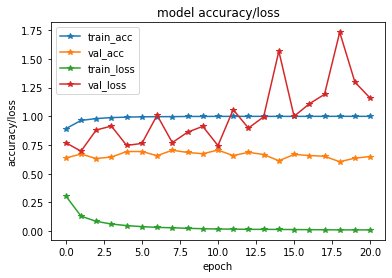


TEST_sz: 1613

Accuracy: 0.7055176689398636

              precision    recall  f1-score   support

       truth      0.665     0.941     0.779       891
       rumor      0.850     0.416     0.558       722

   micro avg      0.706     0.706     0.706      1613
   macro avg      0.757     0.678     0.669      1613
weighted avg      0.748     0.706     0.680      1613
 samples avg      0.706     0.706     0.706      1613




In [5]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_TextCNN_TwoBranches2', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 118, 256)     230656      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 117, 256)     307456      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_18 

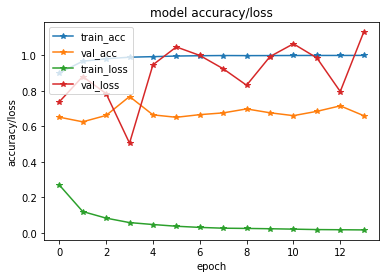


TEST_sz: 1613

Accuracy: 0.7675139491630503

              precision    recall  f1-score   support

       truth      0.745     0.880     0.807       891
       rumor      0.809     0.629     0.708       722

   micro avg      0.768     0.768     0.768      1613
   macro avg      0.777     0.754     0.757      1613
weighted avg      0.774     0.768     0.763      1613
 samples avg      0.768     0.768     0.768      1613




In [6]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_TextCNN_TwoBranches3', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 118, 256)     230656      embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 117, 256)     307456      embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_21 

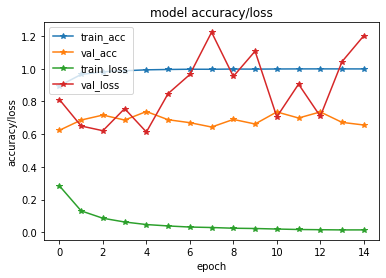


TEST_sz: 1613

Accuracy: 0.7383756974581525

              precision    recall  f1-score   support

       truth      0.700     0.920     0.795       891
       rumor      0.839     0.514     0.637       722

   micro avg      0.738     0.738     0.738      1613
   macro avg      0.770     0.717     0.716      1613
weighted avg      0.763     0.738     0.725      1613
 samples avg      0.738     0.738     0.738      1613




In [7]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_TextCNN_TwoBranches3', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 118, 256)     230656      embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, 117, 256)     307456      embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_24 

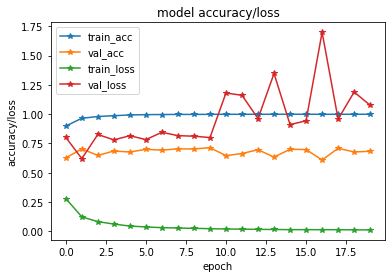


TEST_sz: 1613

Accuracy: 0.7135771853688778

              precision    recall  f1-score   support

       truth      0.671     0.943     0.784       891
       rumor      0.859     0.431     0.574       722

   micro avg      0.714     0.714     0.714      1613
   macro avg      0.765     0.687     0.679      1613
weighted avg      0.755     0.714     0.690      1613
 samples avg      0.714     0.714     0.714      1613




In [8]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_TextCNN_TwoBranches4', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 118, 256)     230656      embedding_9[0][0]                
__________________________________________________________________________________________________
conv1d_26 (Conv1D)              (None, 117, 256)     307456      embedding_9[0][0]                
__________________________________________________________________________________________________
conv1d_27 

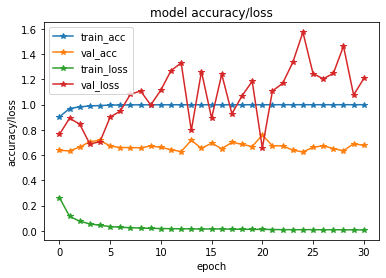


TEST_sz: 1613

Accuracy: 0.759454432734036

              precision    recall  f1-score   support

       truth      0.721     0.920     0.809       891
       rumor      0.851     0.561     0.676       722

   micro avg      0.759     0.759     0.759      1613
   macro avg      0.786     0.741     0.742      1613
weighted avg      0.779     0.759     0.749      1613
 samples avg      0.759     0.759     0.759      1613




In [9]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesTextCNN(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                           related_branch_layer=related_model.get_layer(
                               'category_branch'),
                           unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_TextCNN_TwoBranches5', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

## BiGRU: Category 分支不再设置测试集

In [2]:
category_train_we = np.load(
    '../dataset/data/category_balanced3_X_train_(1054, 120).npy')
category_test_we = np.load(
    '../dataset/data/category_balanced3_X_test_(118, 120).npy')
we_emb_matrix = np.load(
    '../Semantics/data/we_embedding_matrix_(6000, 300).npy')

y_category_train = np.load(
    '../dataset/data/category_balanced3_y_train_(1054, 3).npy')
y_category_test = np.load(
    '../dataset/data/category_balanced3_y_test_(118, 3).npy')


CATEGORY = ['军事', '政治', '其他']

In [3]:
category_we = np.concatenate([category_train_we, category_test_we])
y_category = np.concatenate([y_category_train, y_category_test])

category_we.shape, y_category.shape

((1172, 120), (1172, 3))

### Related Branch

In [5]:
from TextModels import BiGRU
from train import train

model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=3, gradient_reversal=False).model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 120, 64)      63936       embedding_2[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 64)           0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
global_max

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 120, 64)      63936       embedding_5[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_5 (Glo (None, 64)           0           bidirectional_5[0][0]            
__________________________________________________________________________________________________
global_max

1172/1172 [==============================] - 1s 1ms/step - loss: 0.1864 - acc: 0.9966 - val_loss: 0.1829 - val_acc: 0.9915
Epoch 39/100
1172/1172 [==============================] - 1s 958us/step - loss: 0.1815 - acc: 0.9966 - val_loss: 0.1783 - val_acc: 0.9915
Epoch 40/100
1172/1172 [==============================] - 1s 994us/step - loss: 0.1771 - acc: 0.9966 - val_loss: 0.1740 - val_acc: 0.9915
Epoch 41/100
1172/1172 [==============================] - 1s 1ms/step - loss: 0.1727 - acc: 0.9966 - val_loss: 0.1704 - val_acc: 0.9915
Epoch 42/100
1172/1172 [==============================] - 1s 1ms/step - loss: 0.1687 - acc: 0.9966 - val_loss: 0.1665 - val_acc: 0.9915
Epoch 43/100
1172/1172 [==============================] - 1s 1ms/step - loss: 0.1651 - acc: 0.9966 - val_loss: 0.1652 - val_acc: 0.9915
Epoch 44/100
1172/1172 [==============================] - 1s 992us/step - loss: 0.1619 - acc: 0.9966 - val_loss: 0.1593 - val_acc: 0.9915
Epoch 45/100
1172/1172 [==============================]

1172/1172 [==============================] - 1s 909us/step - loss: 0.1150 - acc: 0.9872 - val_loss: 0.1065 - val_acc: 0.9915
Epoch 98/100
1172/1172 [==============================] - 1s 913us/step - loss: 0.1045 - acc: 0.9949 - val_loss: 0.1000 - val_acc: 0.9915
Epoch 99/100
1172/1172 [==============================] - 1s 957us/step - loss: 0.0973 - acc: 0.9966 - val_loss: 0.0970 - val_acc: 0.9915
Epoch 100/100
1172/1172 [==============================] - 1s 934us/step - loss: 0.0947 - acc: 0.9974 - val_loss: 0.0946 - val_acc: 0.9915


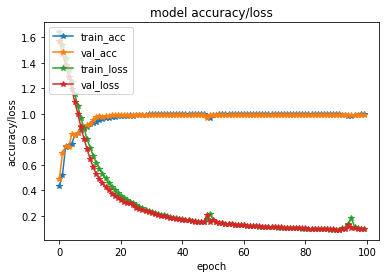

In [8]:
# 1.修改输入数据
X_train = [category_we]
X_test = [category_test_we]

y_train = [y_category]
y_test = [y_category_test]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=3, gradient_reversal=False).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_AllData_RelatedBranch_useClassWeight',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=256, multi_output=False, monitor='val_loss', 
      labels_name=CATEGORY, use_class_weights=True, to_predict=False)

### Unrelated Branch

In [9]:
from TextModels import BiGRU
from train import train

model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=3, gradient_reversal=True).model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_6 (Bidirectional) (None, 120, 64)      63936       embedding_6[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_6 (Glo (None, 64)           0           bidirectional_6[0][0]            
__________________________________________________________________________________________________
global_max

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 120, 64)      63936       embedding_7[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_7 (Glo (None, 64)           0           bidirectional_7[0][0]            
__________________________________________________________________________________________________
global_max

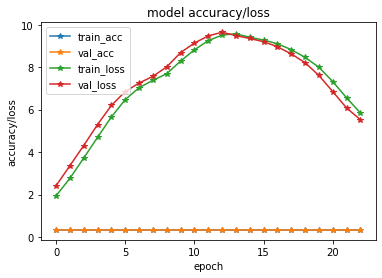

In [10]:
# 1.修改输入数据
X_train = [category_we]
X_test = [category_test_we]

y_train = [y_category]
y_test = [y_category_test]

# 2.修改model
model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
              output=3, gradient_reversal=True).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_AllData_UnrelatedBranch_useClassWeight',
      train_data=X_train, test_data=X_test, train_label=y_train, test_label=y_test, epochs=100,
      batch_size=256, multi_output=False, monitor='val_loss', monitor_mode='max',
      labels_name=CATEGORY, use_class_weights=True, to_predict=False)

### Two Branches Merge

In [11]:
from TextModels import BiGRU
from TextTransferModels import TwoBranchesBiGRU
from train import train

related_model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                      output=3, gradient_reversal=False).model
unrelated_model = BiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                        output=3, gradient_reversal=True).model

related_model.load_weights('./model/Branches_Balanced3_BiGRU_AllData_RelatedBranch_useClassWeight.hdf5')
unrelated_model.load_weights('./model/Branches_Balanced3_BiGRU_AllData_UnrelatedBranch_useClassWeight.hdf5')

model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer('category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model
model.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/keras/engine/topology.py:622: UserWarning: Class `GradientReversal.GradientReversal` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_10 (Bidirectional (None, 120, 64)      63936       embedding_10[0][0]               
__________________________________________________________________________________________________
global_average_pooling1d_10 (Gl (None, 64)           0           bidirectional_10[0][0]           
__________________________________________________________________________________________________
global_max

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_11 (Bidirectional (None, 120, 64)      63936       embedding_11[0][0]               
__________________________________________________________________________________________________
global_average_pooling1d_11 (Gl (None, 64)           0           bidirectional_11[0][0]           
__________________________________________________________________________________________________
global_max

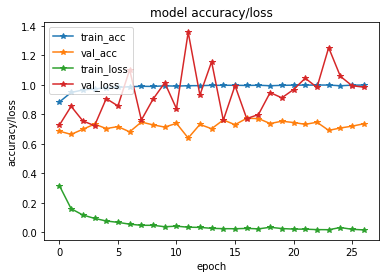


TEST_sz: 1613

Accuracy: 0.7730936143831371

              precision    recall  f1-score   support

       truth      0.736     0.919     0.817       891
       rumor      0.856     0.593     0.700       722

   micro avg      0.773     0.773     0.773      1613
   macro avg      0.796     0.756     0.759      1613
weighted avg      0.790     0.773     0.765      1613
 samples avg      0.773     0.773     0.773      1613




In [12]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_CategoryAllData_TwoBranches', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_12 (Bidirectional (None, 120, 64)      63936       embedding_12[0][0]               
__________________________________________________________________________________________________
global_average_pooling1d_12 (Gl (None, 64)           0           bidirectional_12[0][0]           
__________________________________________________________________________________________________
global_max

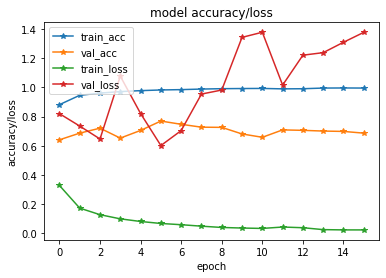


TEST_sz: 1613

Accuracy: 0.7693738375697459

              precision    recall  f1-score   support

       truth      0.752     0.869     0.806       891
       rumor      0.800     0.647     0.715       722

   micro avg      0.769     0.769     0.769      1613
   macro avg      0.776     0.758     0.761      1613
weighted avg      0.773     0.769     0.765      1613
 samples avg      0.769     0.769     0.769      1613




In [13]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_CategoryAllData_TwoBranches2', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_13 (Bidirectional (None, 120, 64)      63936       embedding_13[0][0]               
__________________________________________________________________________________________________
global_average_pooling1d_13 (Gl (None, 64)           0           bidirectional_13[0][0]           
__________________________________________________________________________________________________
global_max

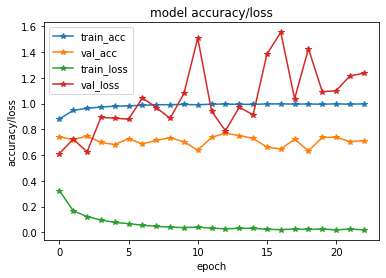


TEST_sz: 1613

Accuracy: 0.7699938003719777

              precision    recall  f1-score   support

       truth      0.733     0.919     0.815       891
       rumor      0.855     0.586     0.695       722

   micro avg      0.770     0.770     0.770      1613
   macro avg      0.794     0.753     0.755      1613
weighted avg      0.787     0.770     0.762      1613
 samples avg      0.770     0.770     0.770      1613




In [14]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_CategoryAllData_TwoBranches3', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_14 (Bidirectional (None, 120, 64)      63936       embedding_14[0][0]               
__________________________________________________________________________________________________
global_average_pooling1d_14 (Gl (None, 64)           0           bidirectional_14[0][0]           
__________________________________________________________________________________________________
global_max

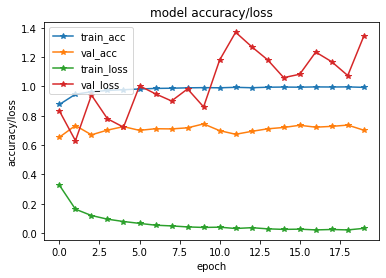


TEST_sz: 1613

Accuracy: 0.7445753254804711

              precision    recall  f1-score   support

       truth      0.703     0.930     0.801       891
       rumor      0.857     0.515     0.644       722

   micro avg      0.745     0.745     0.745      1613
   macro avg      0.780     0.723     0.722      1613
weighted avg      0.772     0.745     0.731      1613
 samples avg      0.745     0.745     0.745      1613




In [15]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_CategoryAllData_TwoBranches4', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_15 (Embedding)        (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
bidirectional_15 (Bidirectional (None, 120, 64)      63936       embedding_15[0][0]               
__________________________________________________________________________________________________
global_average_pooling1d_15 (Gl (None, 64)           0           bidirectional_15[0][0]           
__________________________________________________________________________________________________
global_max

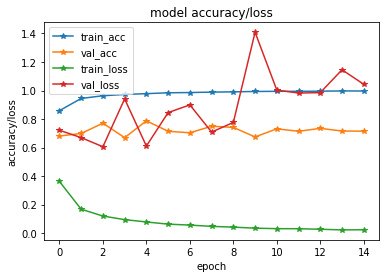


TEST_sz: 1613

Accuracy: 0.78735275883447

              precision    recall  f1-score   support

       truth      0.759     0.900     0.824       891
       rumor      0.840     0.648     0.732       722

   micro avg      0.787     0.787     0.787      1613
   macro avg      0.800     0.774     0.778      1613
weighted avg      0.796     0.787     0.783      1613
 samples avg      0.787     0.787     0.787      1613




In [16]:
# 1.修改输入数据
X_train = [train_we]
X_test = [test_we]

y_train = [y_fake_train]
y_test = [y_fake_test]

# 2.修改model
model = TwoBranchesBiGRU(max_sequence_length=120, embedding_matrix=we_emb_matrix,
                         related_branch_layer=related_model.get_layer(
                             'category_branch'),
                         unrelated_branch_layer=unrelated_model.get_layer('category_branch')).model

# 3.修改model_name、超参数
train(model, model_name='Branches_Balanced3_BiGRU_CategoryAllData_TwoBranches5', train_data=X_train,
      test_data=X_test, train_label=y_train, test_label=y_test, epochs=100, batch_size=128)